In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')

In [6]:
df.shape

(14999, 10)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

In [19]:
encoded = ordinal.fit_transform(df[['Department']])

In [20]:
df.drop('Department',axis=1,inplace=True)

In [22]:
df['Department'] = pd.DataFrame(encoded,columns=ordinal.get_feature_names_out())

In [23]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department
0,0.38,0.53,2,157,3,0,1,0,low,7.0
1,0.80,0.86,5,262,6,0,1,0,medium,7.0
2,0.11,0.88,7,272,4,0,1,0,medium,7.0
3,0.72,0.87,5,223,5,0,1,0,low,7.0
4,0.37,0.52,2,159,3,0,1,0,low,7.0


In [24]:
df['Department'].value_counts()

Department
7.0    4140
9.0    2720
8.0    2229
0.0    1227
6.0     902
5.0     858
1.0     787
2.0     767
3.0     739
4.0     630
Name: count, dtype: int64

In [16]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [26]:
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department
0,0.38,0.53,2,157,3,0,1,0,0,7.0
1,0.80,0.86,5,262,6,0,1,0,1,7.0
2,0.11,0.88,7,272,4,0,1,0,1,7.0
3,0.72,0.87,5,223,5,0,1,0,0,7.0
4,0.37,0.52,2,159,3,0,1,0,0,7.0


# *Seperating the Dependent and Independent Variable*

In [29]:
X = df.drop('salary',axis=1)
y = df['salary']

In [31]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,7.0
1,0.80,0.86,5,262,6,0,1,0,7.0
2,0.11,0.88,7,272,4,0,1,0,7.0
3,0.72,0.87,5,223,5,0,1,0,7.0
4,0.37,0.52,2,159,3,0,1,0,7.0


In [32]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int64

# *Perfoming the Train Test Split*

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.35, random_state=42)

In [35]:
Xtrain.shape, Xtest.shape

((9749, 9), (5250, 9))

In [36]:
ytrain.shape, ytest.shape

((9749,), (5250,))

In [75]:
from sklearn.tree import DecisionTreeClassifier

treclassifier = DecisionTreeClassifier(max_depth=10,criterion='log_loss')

In [76]:
treclassifier.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=10)

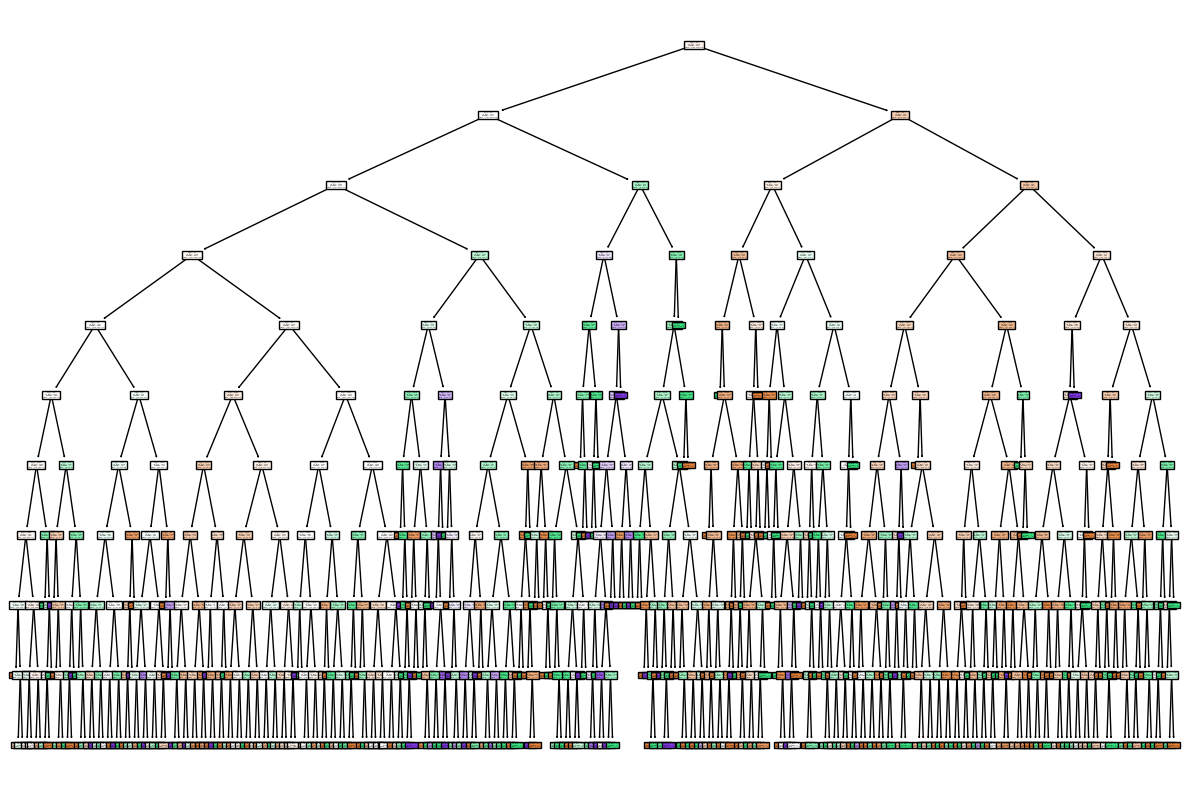

In [77]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(treclassifier,filled=True)
plt.show()

In [78]:
ypred = treclassifier.predict(Xtest)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score :\n{accuracy_score(ypred,ytest)}")
print("\n==========================================================================\n")
print(f"Classification Report :\n{classification_report(ypred,ytest)}")

Accuracy Score :
0.5373333333333333


Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.53      0.65      4077
           1       0.26      0.58      0.36      1019
           2       0.16      0.44      0.23       154

    accuracy                           0.54      5250
   macro avg       0.42      0.52      0.41      5250
weighted avg       0.71      0.54      0.58      5250

